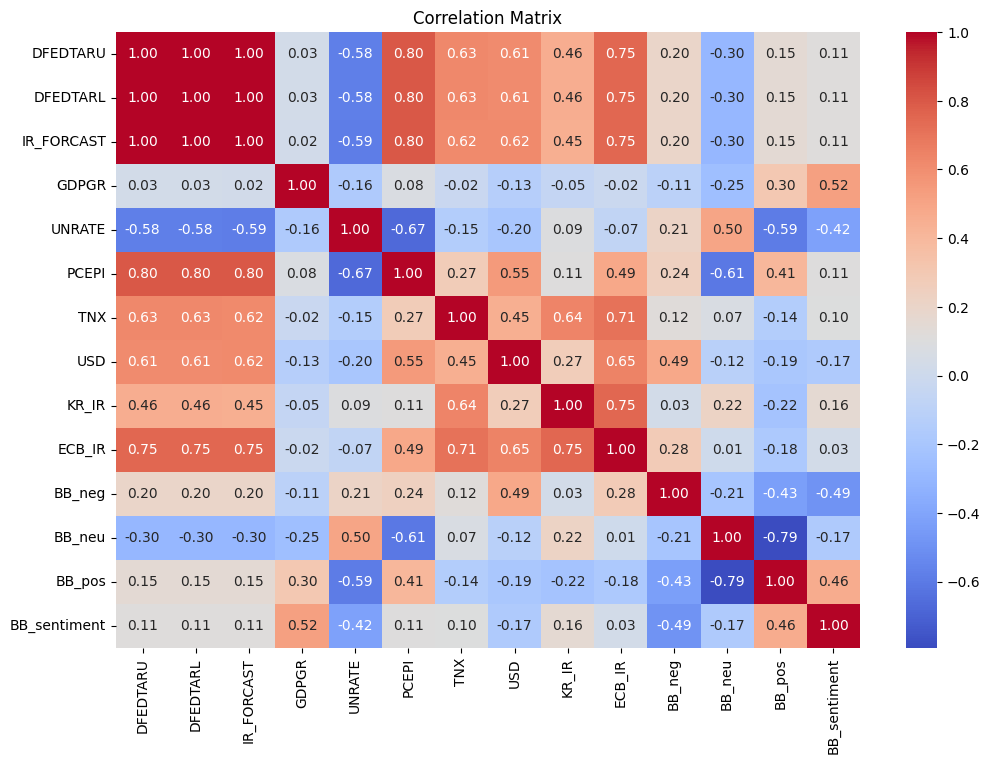

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
file_path = 'Interest_rate_prediction.csv'
df = pd.read_csv(file_path)

# 2. 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 3. 상관관계 행렬 계산
correlation_matrix = numeric_df.corr()

# 4. 상관관계 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# 숫자형 데이터 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_df.columns

# 표준화 적용
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 결과 확인
print(df[numeric_columns].head())


   DFEDTARU  DFEDTARL  IR_FORCAST  A191RL1Q225SBEA    UNRATE     PCEPI  \
0 -0.588904 -0.588904   -0.436086        -1.132148  0.743144 -1.419360   
1 -0.588904 -0.588904   -0.594739        -1.132148  0.957072 -1.402677   
2 -0.588904 -0.588904   -0.594739        -1.132148  1.128215 -1.412919   
3 -0.588904 -0.588904   -0.594739        -0.502695  1.256572 -1.399616   
4 -0.588904 -0.588904   -0.594739        -0.502695  1.427714 -1.389902   

        TNX       USD     KR_IR    ECB_IR    BB_neg    BB_neu    BB_pos  \
0 -0.258929  1.008182  1.092059  1.417936 -0.035535  2.463302 -2.254689   
1  0.405326  2.324617  0.529483  1.006717 -0.035535  2.463302 -2.254689   
2  0.623423  4.019527 -0.033093  1.006717  1.258203  1.425291 -2.107112   
3  0.199407  2.324617 -0.033093  0.595498  1.787459  0.906285 -1.959536   
4  0.770667  1.255013 -0.033093  0.389889  1.787459  0.906285 -1.959536   

   BB_sentiment  
0      0.181925  
1      0.181925  
2     -1.153969  
3     -4.858081  
4     -4.85808

In [5]:
#데이터 정규화/표준화
from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_columns = numeric_df.columns

# Apply standardization
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows after standardization
df[numeric_columns].head()


,DFEDTARU,DFEDTARL,IR_FORCAST,A191RL1Q225SBEA,UNRATE,PCEPI,TNX,USD,KR_IR,ECB_IR,BB_neg,BB_neu,BB_pos,BB_sentiment
0,-0.588904,-0.588904,-0.436086,-1.132148,0.743144,-1.419360,-0.258929,1.008182,1.092059,1.417936,-0.035535,2.463302,-2.254689,0.181925
1,-0.588904,-0.588904,-0.594739,-1.132148,0.957072,-1.402677,0.405326,2.324617,0.529483,1.006717,-0.035535,2.463302,-2.254689,0.181925
2,-0.588904,-0.588904,-0.594739,-1.132148,1.128215,-1.412919,0.623423,4.019527,-0.033093,1.006717,1.258203,1.425291,-2.107112,-1.153969
3,-0.588904,-0.588904,-0.594739,-0.502695,1.256572,-1.399616,0.199407,2.324617,-0.033093,0.595498,1.787459,0.906285,-1.959536,-4.858081
4,-0.588904,-0.588904,-0.594739,-0.502695,1.427714,-1.389902,0.770667,1.255013,-0.033093,0.389889,1.787459,0.906285,-1.959536,-4.858081


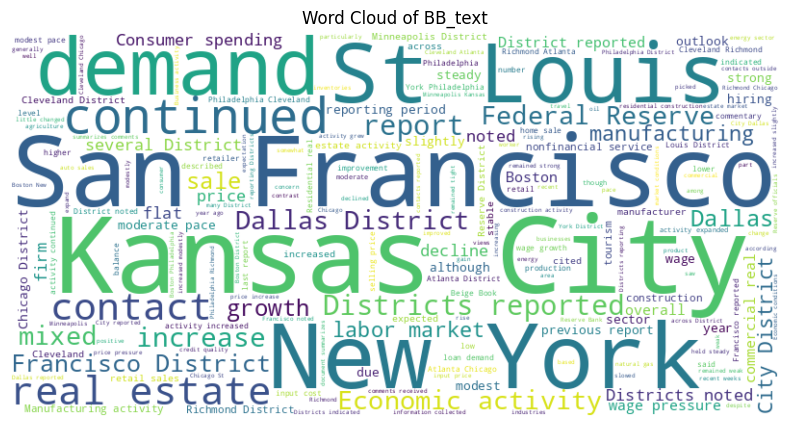

In [9]:
#텍스트 데이터 분석
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 데이터를 결합한 후 워드클라우드 생성
text = ' '.join(df['BB_text'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of BB_text')
plt.show()


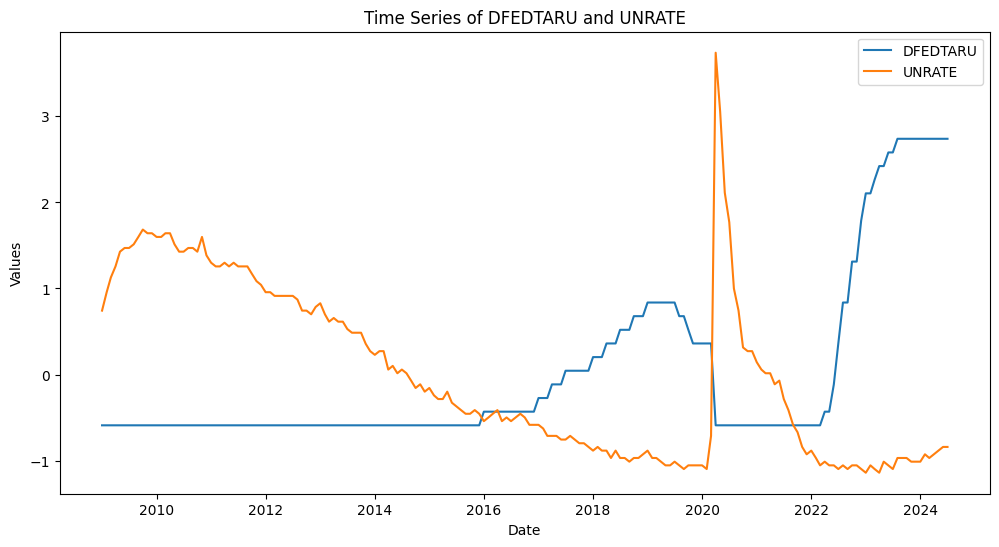

In [10]:
#시간에 따른 변화 분석
import matplotlib.pyplot as plt

# DATE 열을 datetime 형식으로 변환
df['DATE'] = pd.to_datetime(df['DATE'])

# DFEDTARU와 UNRATE의 시계열 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['DFEDTARU'], label='DFEDTARU')
plt.plot(df['DATE'], df['UNRATE'], label='UNRATE')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of DFEDTARU and UNRATE')
plt.legend()
plt.show()


In [3]:
import pandas as pd

# 데이터 로드 (파일 경로를 실제 경로로 변경하세요)
file_path = 'Interest_rate_prediction.csv'  # 예시 파일 경로
df = pd.read_csv(file_path)

# 기존 데이터프레임 df를 CSV로 저장
df.to_csv('result_eda_202408.csv', index=False)

# 추가적인 결과가 있다면, 별도의 데이터프레임으로 변환 후 저장
# 예를 들어, 통계량 결과를 저장
stats_df = df.describe()
stats_df.to_csv('result_eda_stats_202408.csv')

# 숫자형 데이터만 선택하여 상관관계 매트릭스를 계산 및 저장
numeric_df = df.select_dtypes(include=[float, int])
corr_df = numeric_df.corr()
corr_df.to_csv('result_eda_corr_202408.csv')


In [ ]:
df.to_csv('./../../result1/result_model_202408.csv', index=False)